In [1]:
import torch
from torch.autograd import Variable
import numpy as np
import pylab as plt
%matplotlib inline
import torchvision.utils as vutils
import glob

In [2]:
import sys
sys.path.append('../')
import models
import models.mnist
from data import get_loaders
from utils import DictWrapper

In [3]:
%load_ext autoreload
%autoreload 1

In [4]:
%aimport log_plotter
from log_plotter import get_run_names, get_data, get_data_pth, plot_smooth, plot_tag, plot_runs_and_tags, get_legend, plot_smooth_o1

In [130]:
no_title = True
save_single = True
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # 3
matplotlib.rcParams['ps.fonttype'] = 42  # 3

plt.rcParams.update({'font.size': 12})

In [128]:
no_title = False
save_single = False
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 3
matplotlib.rcParams['ps.fonttype'] = 3

# MNIST bucket 1024

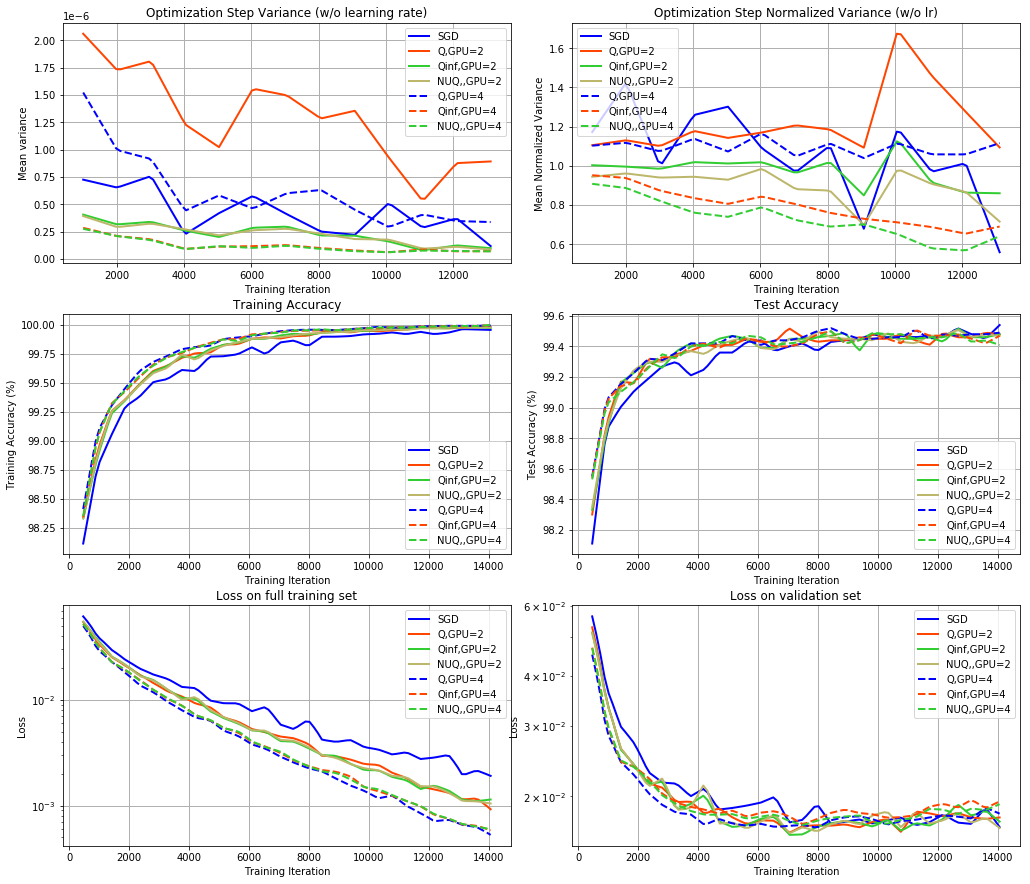

In [69]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_mnist_nuq/(00|.*bucket_size_1024)']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'Tacc', 'Vacc', 'Tloss', 'Vloss']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/mnist_bucket1024.png'
lg_tags = ['estim_sgd', 'nuq_method', 'ngpu']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'Q'), ('_nuq', 'NUQ'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace)

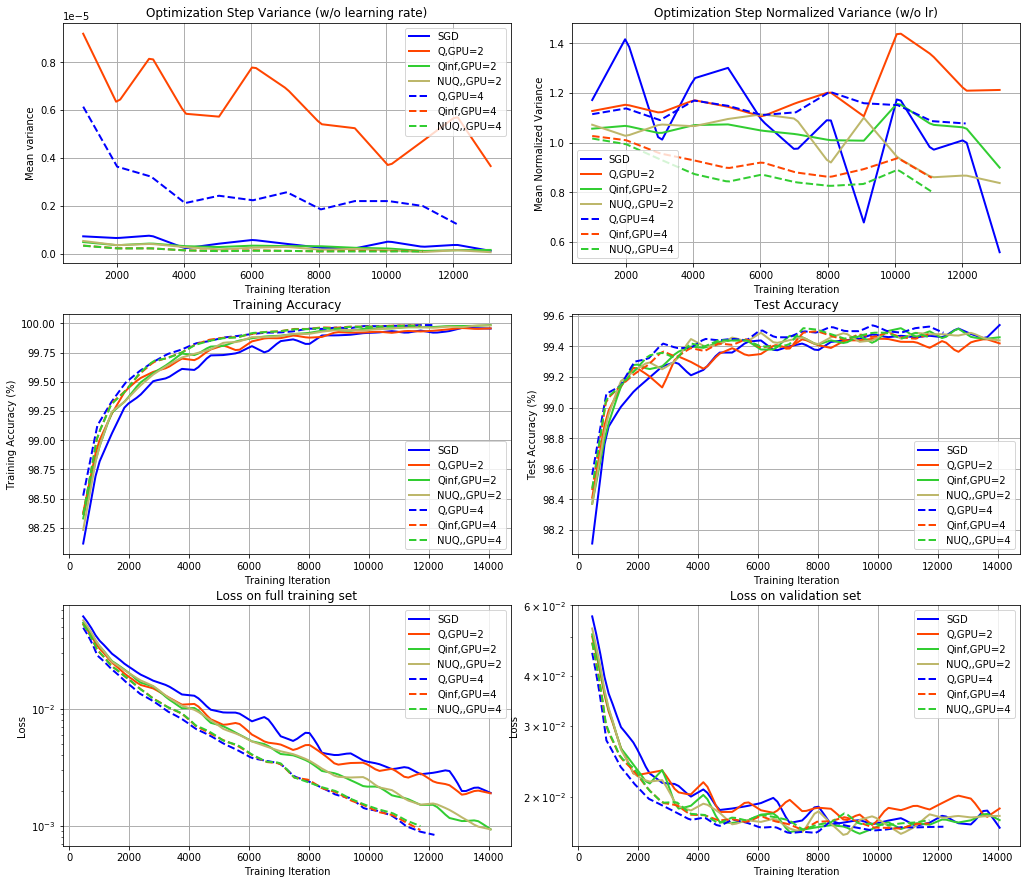

In [65]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_mnist_nuq/(00|.*bucket_size_4096)']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'Tacc', 'Vacc', 'Tloss', 'Vloss']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/mnist.png'
lg_tags = ['estim_sgd', 'nuq_method', 'ngpu']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'Q'), ('_nuq', 'NUQ'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace)

# MNIST bucket 8196

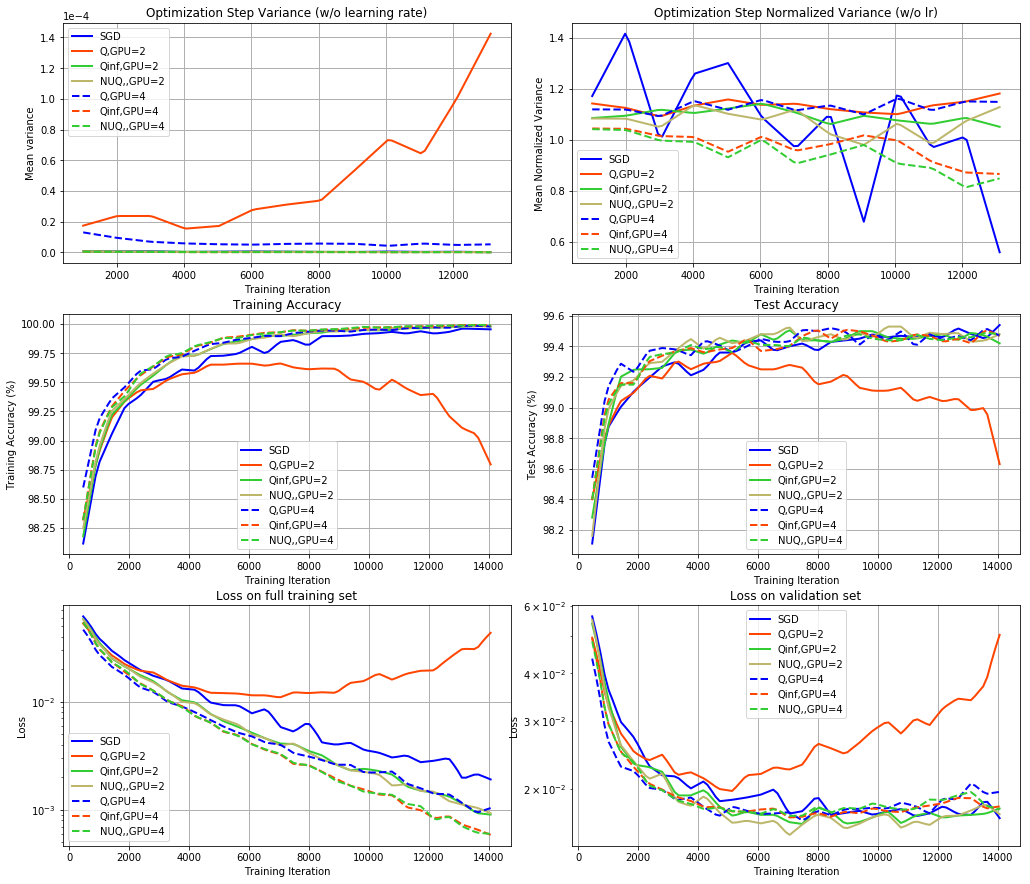

In [68]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_mnist_nuq/(00|.*bucket_size_8192)']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'Tacc', 'Vacc', 'Tloss', 'Vloss']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/mnist.png'
lg_tags = ['estim_sgd', 'nuq_method', 'ngpu']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'Q'), ('_nuq', 'NUQ'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace)

# cifar10 first epoch

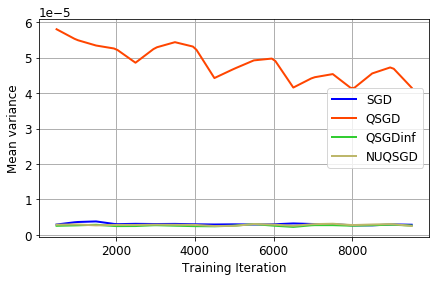

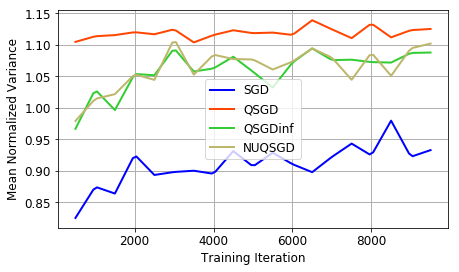

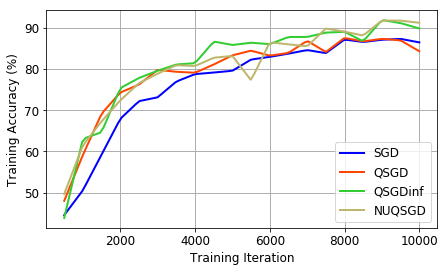

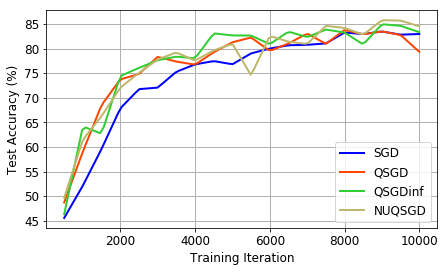

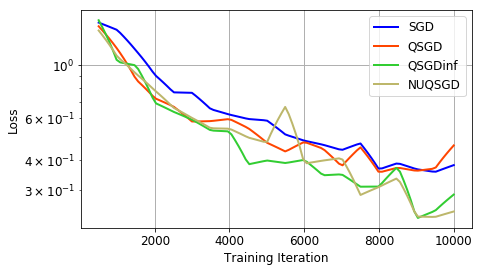

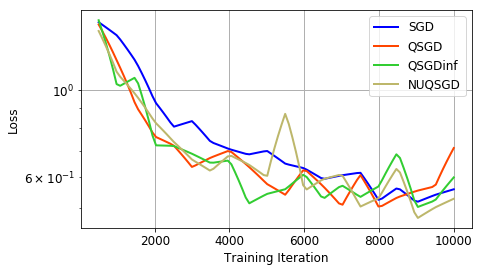

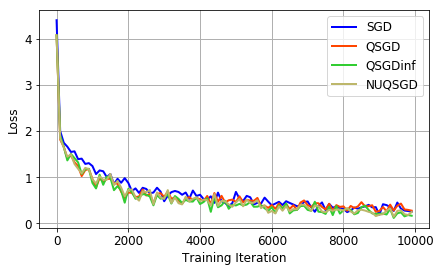

<Figure size 504x288 with 0 Axes>

In [134]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_cifar10_first_epoch/(00|.*bucket_size_8192)']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'Tacc', 'Vacc', 'Tloss', 'Vloss', 'loss']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/cifar10.png'
lg_tags = ['estim_sgd', 'nuq_method']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'QSGD'), ('_nuq', 'NUQSGD'), ('_qinf', 'QinfSGD'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), (',,', ','), (',$', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

# imagenet last epoch

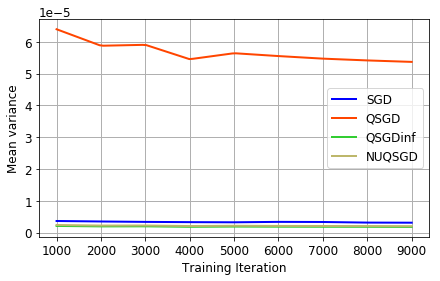

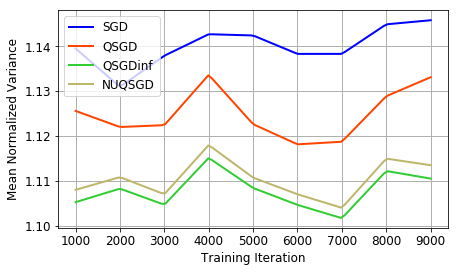

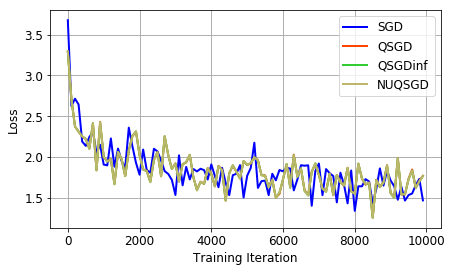

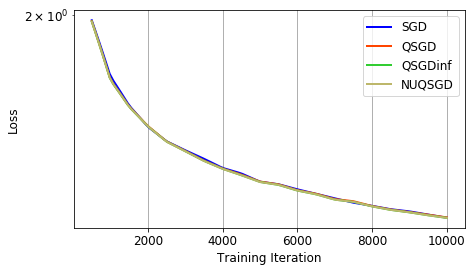

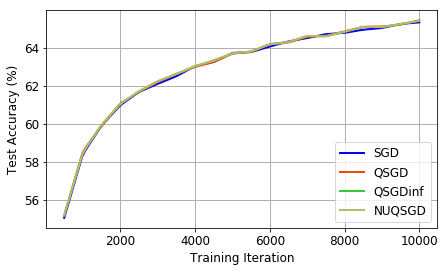

<Figure size 504x288 with 0 Axes>

In [135]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_imagenet_last_epoch/.*batch_size_128']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'loss', 'Vloss', 'Vacc']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/imagenet_last.png'
lg_tags = ['estim_sgd', 'nuq_method']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'QSGD'), ('_nuq', 'NUQSGD'), ('_qinf', 'QinfSGD'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), (',,', ','), (',$', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## batch size 64

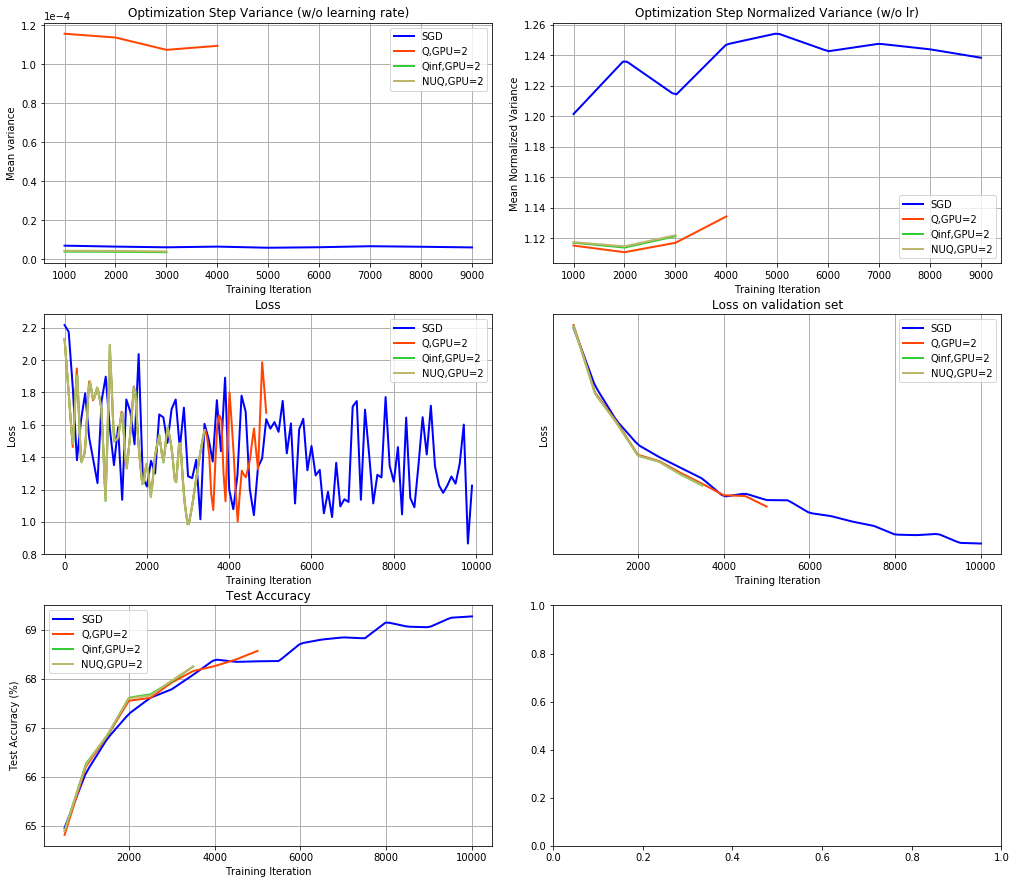

In [121]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_imagenet_last_epoch/.*batch_size_64']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'loss', 'Vloss', 'Vacc']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/imagenet_last_bs64.png'
lg_tags = ['estim_sgd', 'nuq_method', 'ngpu']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'Q'), ('_nuq', 'NUQ'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), (',,', ','), (',$', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## batch size 256

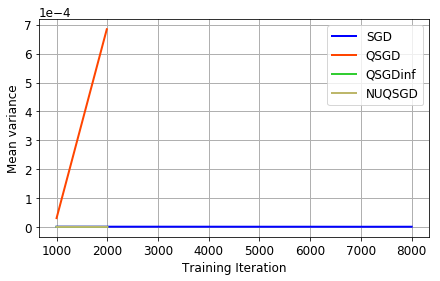

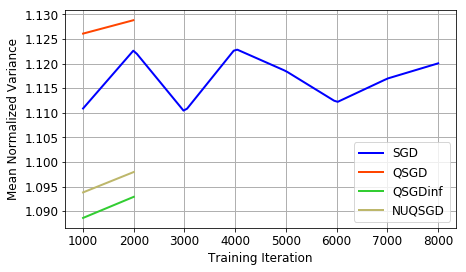

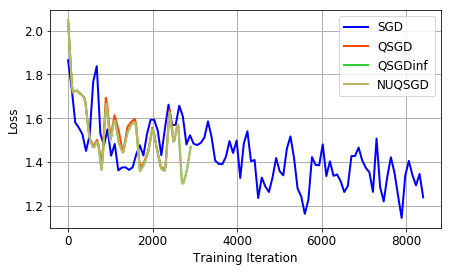

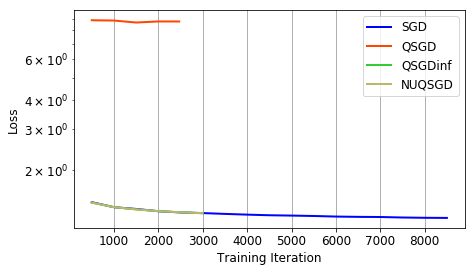

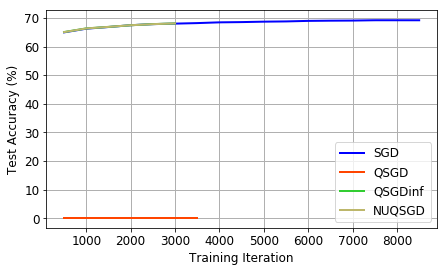

<Figure size 504x288 with 0 Axes>

In [136]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_imagenet_last_epoch/.*batch_size_256']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'loss', 'Vloss', 'Vacc']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/imagenet_last_bs256.png'
lg_tags = ['estim_sgd', 'nuq_method']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'QSGD'), ('_nuq', 'NUQSGD'), ('_qinf', 'QinfSGD'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), (',,', ','), (',$', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

nans in QSGD

# imagenet first epoch

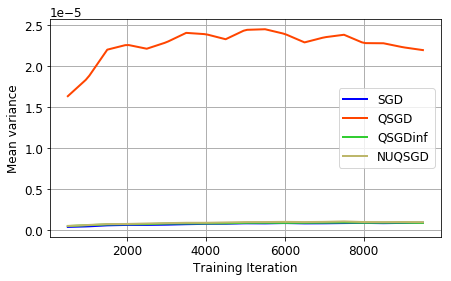

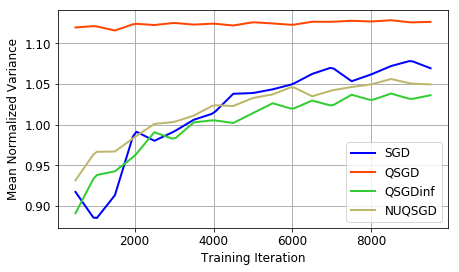

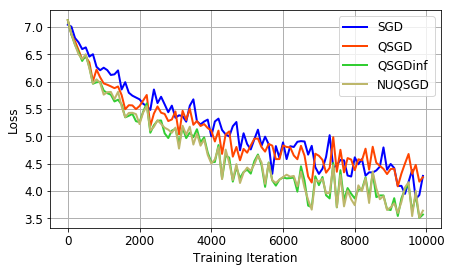

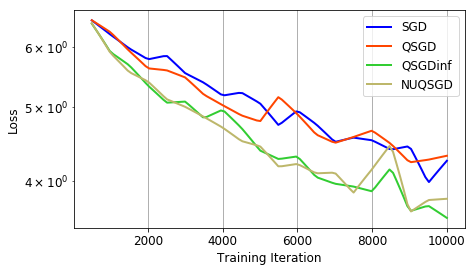

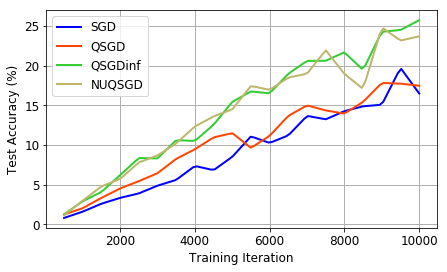

<Figure size 504x288 with 0 Axes>

In [137]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_imagenet_first_epoch/.*batch_size_128']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'loss', 'Vloss', 'Vacc']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/imagenet_first.png'
lg_tags = ['estim_sgd', 'nuq_method']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'QSGD'), ('_nuq', 'NUQSGD'), ('_qinf', 'QinfSGD'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$'), (',,', ','), (',$', '')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace, save_single=save_single, no_title=no_title)

## batch size 64

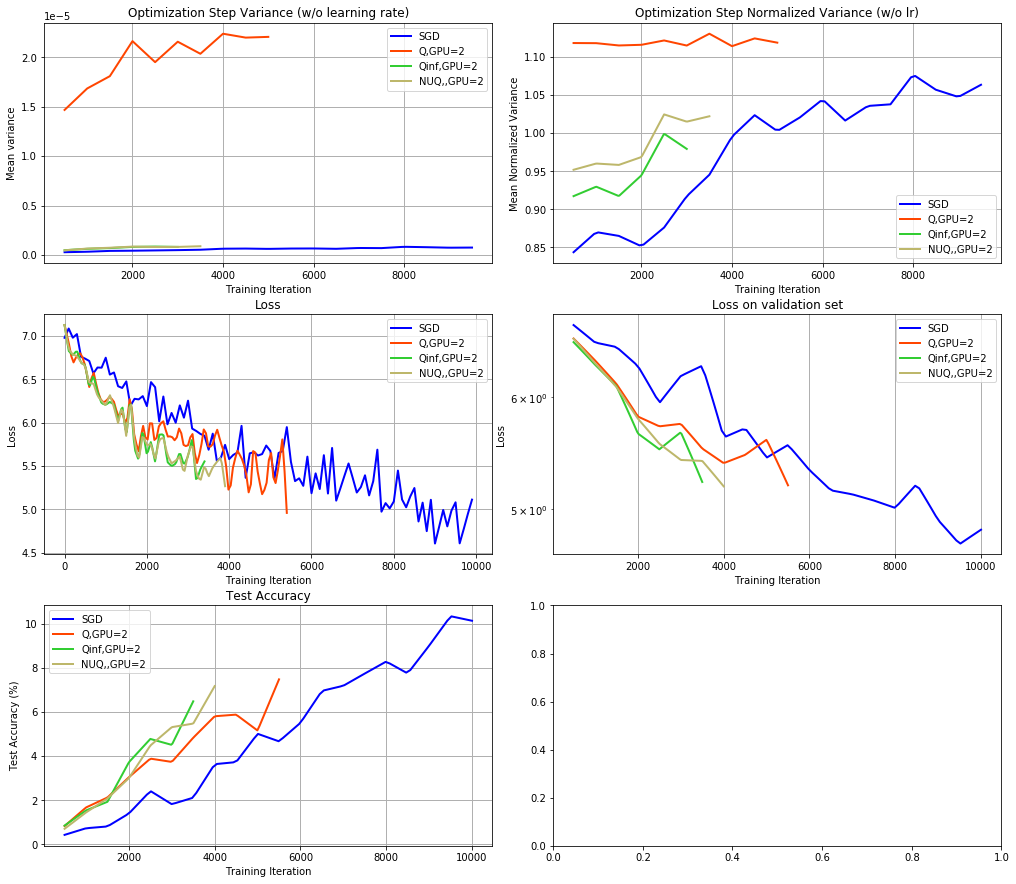

In [122]:
get_data_f = get_data_pth
# plot_f = plt.plot
plot_f = plot_smooth_o1
logdir = '/u/faghri/nuq/runs/'
patterns = ['.*runs_imagenet_first_epoch/.*batch_size_64']  # (?!.*scheduler)
tag_names = ['est_var', 'est_nvar', 'loss', 'Vloss', 'Vacc']  # 'lr', 'gb_td', 'grad_bias',
fig_name = 'figs_nuq/imagenet_first_bs64.png'
lg_tags = ['estim_sgd', 'nuq_method', 'ngpu']  # , 'ngpu', 'bits', 'mul', 'bucket_size'
ylim = [None]*20
# ylim = [None]*2 + [[80, 100], [80, 100], [1e-7, 1], None]
# ylim = [[.2e-4, 1e-4], [0, 1.5e-7], [-1, 0.1], None, [98, 100], [98, 100], None, None]
# ylim = [[1e-4, 1e-1], [1e-2, 1e-1], [98, 100], [97,100], [0, 100], None, None, None, None, None, None, None, None, None, None, None, None]
sep_h = True
ncolor = 4
lg_replace = [('estim_sgd', 'SGD'), ('ngpu_', ',GPU='), ('nuq_method', ''), ('_q', 'Q'), ('_nuq', 'NUQ'), ('_qinf', 'Qinf'), ('kfac', 'K-FAC'), ('SGD,K-FAC', 'K-FAC'), ('estim_ntk', 'NTK'), ('adamw', 'AdamW'), ('adam', 'Adam'), ('lr_', 'LR='), ('LR=0.001', 'LR=1e-3'), ('LR=0.0001', 'LR=1e-4'), ('LR=0.0005', 'LR=5e-4'), ('LR=0.0002', 'LR=2e-4'), ('batch_size_', 'bs='), ('optim_start_', 'Start='), ('damping_', '$\epsilon=$')]
data, run_names = plot_runs_and_tags(get_data_f, plot_f, logdir, patterns, tag_names, fig_name, lg_tags, ylim, sep_h=sep_h, ncolor=ncolor, lg_replace=lg_replace)